In [2]:
!pip install "qrcode[pil]"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 1.6 MB/s eta 0:00:00


--- 
### Test für Stufe: `L (Low, ~7%)`

**Original (unbeschädigt):** Dieser Code sollte immer funktionieren.

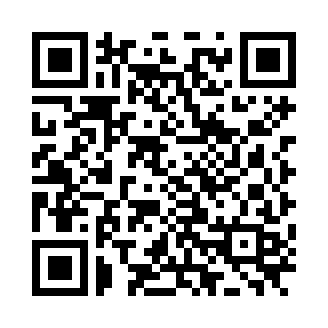

**Beschädigt (23% verdeckt):** Funktioniert dieser Code noch?

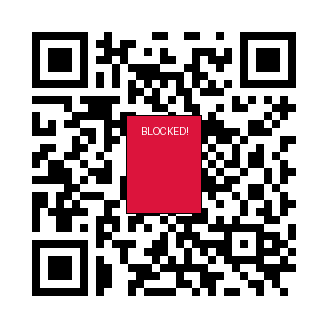

--- 
### Test für Stufe: `M (Medium, ~15%)`

**Original (unbeschädigt):** Dieser Code sollte immer funktionieren.

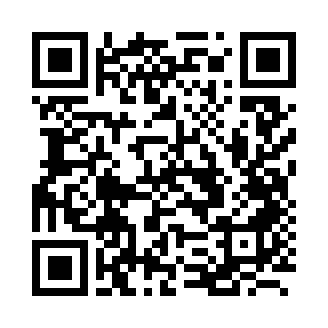

**Beschädigt (23% verdeckt):** Funktioniert dieser Code noch?

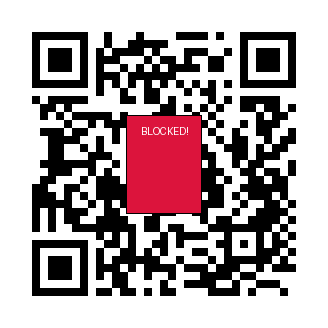

--- 
### Test für Stufe: `Q (Quartile, ~25%)`

**Original (unbeschädigt):** Dieser Code sollte immer funktionieren.

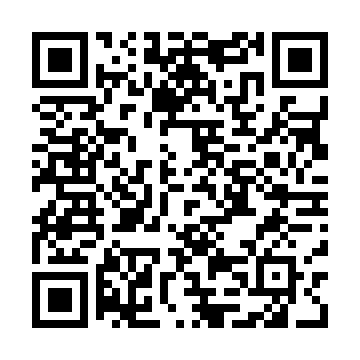

**Beschädigt (23% verdeckt):** Funktioniert dieser Code noch?

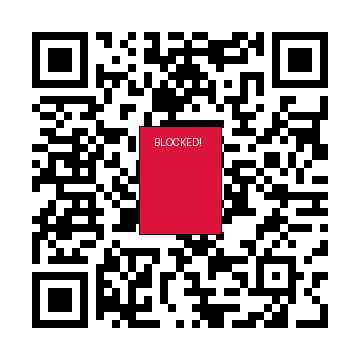

--- 
### Test für Stufe: `H (High, ~30%)`

**Original (unbeschädigt):** Dieser Code sollte immer funktionieren.

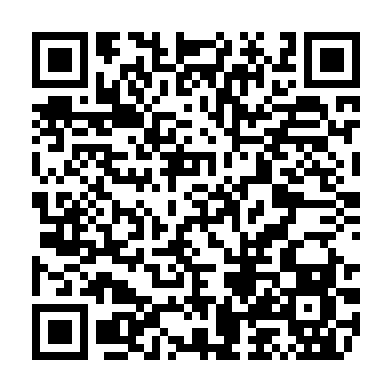

**Beschädigt (23% verdeckt):** Funktioniert dieser Code noch?

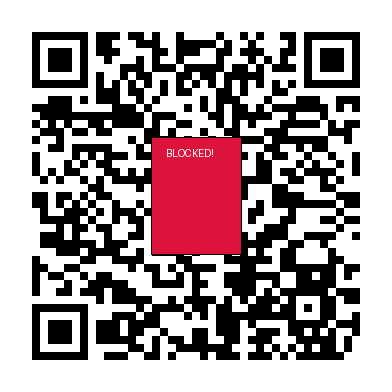

In [5]:
import qrcode
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display, Markdown

# Die Daten, die wir kodieren wollen
data_to_encode = "https://de.wikipedia.org/wiki/Fehlerkorrekturverfahren"

# Definition der zu testenden Fehlerkorrekturstufen
error_levels = {
    "L (Low, ~7%)": qrcode.constants.ERROR_CORRECT_L,
    "M (Medium, ~15%)": qrcode.constants.ERROR_CORRECT_M,
    "Q (Quartile, ~25%)": qrcode.constants.ERROR_CORRECT_Q,
    "H (High, ~30%)": qrcode.constants.ERROR_CORRECT_H,
}

# Prozentsatz des Bildes, der verdeckt werden soll.
damage_percentage = 0.23

# --- Durchführung für jede Stufe ---
for level_name, level_constant in error_levels.items():
    display(Markdown(f"--- \n### Test für Stufe: `{level_name}`"))

    # 1. Originalen QR-Code für die aktuelle Stufe generieren
    qr = qrcode.QRCode(
        version=2, # Eine etwas höhere Version für mehr Datenkapazität
        error_correction=level_constant,
        box_size=8,
        border=4,
    )
    qr.add_data(data_to_encode)
    qr.make(fit=True)
    original_img = qr.make_image(fill_color="black", back_color="white").convert('RGB')

    display(Markdown("**Original (unbeschädigt):** Dieser Code sollte immer funktionieren."))
    display(original_img)

    # 2. Eine "Störung" auf einer Kopie des Bildes erzeugen
    damaged_img = original_img.copy()
    img_width, img_height = damaged_img.size
    draw = ImageDraw.Draw(damaged_img)

    # Grösse und Position der Störung berechnen
    damage_width = int(img_width * damage_percentage)
    damage_height = int(img_height * 0.3) # Machen wir es zu einem breiten Balken

    top_left_x = (img_width - damage_width) // 2
    top_left_y = (img_height - damage_height) // 2
    bottom_right_x = top_left_x + damage_width
    bottom_right_y = top_left_y + damage_height

    # Ein rotes Rechteck als Störung zeichnen
    draw.rectangle(
        [top_left_x, top_left_y, bottom_right_x, bottom_right_y],
        fill="crimson",
        outline="black"
    )

    font = ImageFont.load_default()
    draw.text((top_left_x + 15, top_left_y + 10), "BLOCKED!", fill="white", font=font)

    display(Markdown(f"**Beschädigt ({int(damage_percentage*100)}% verdeckt):** Funktioniert dieser Code noch?"))
    display(damaged_img)